<a href="https://colab.research.google.com/github/AlexKalll/qc-workarounds/blob/main/Copy_of_CHSH_Game_(implementation)Create_a_Google_Colab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I cannot create live Google Drive files (links) directly as I am an AI. However, I will provide the **full content** for both the Google Doc and the Google Colab Notebook below.

You can simply:

1.  Copy the **Google Doc Content** into a new Google Doc or Word file.
2.  Copy the **Google Colab Notebook Content** (cell by cell) into a new Colab notebook.

-----

### Part 1: Google Doc Content

**Filename:** `CHSH_Game_Implementation_Concept.docx`

# CHSH Game and Bell’s Inequality: Implementation Guide

## 1\. Introduction

The CHSH (Clauser-Horne-Shimony-Holt) inequality is a mathematical constraint that local hidden variable theories (classical physics) must obey. Quantum mechanics, however, predicts correlations that violate this inequality, proving that the universe is not locally real in the classical sense. This violation is often demonstrated using the "CHSH Game."

## 2\. The CHSH Game

The game involves two cooperating players, Alice and Bob, and a Referee.

1.  **Setup:** Alice and Bob share an entangled pair of qubits but cannot communicate once the game starts.
2.  **Inputs:** The Referee sends a random bit $x \in \{0, 1\}$ to Alice and $y \in \{0, 1\}$ to Bob.
3.  **Outputs:** Alice outputs a bit $a \in \{0, 1\}$ and Bob outputs $b \in \{0, 1\}$.
4.  **Winning Condition:** They win if the logical AND of their inputs equals the logical XOR of their outputs:
    $$a \oplus b = x \land y$$
    Or equivalently: $a \oplus b = x \cdot y$.

## 3\. Classical vs. Quantum Limits

  * **Classical Limit:** The maximum winning probability for any classical strategy is **75%** (3/4).
  * **Quantum Limit:** By sharing an entangled Bell state and measuring in specific bases, Alice and Bob can achieve a winning probability of $\cos^2(\pi/8) \approx$ **85%**.
  * **The S-Value:** In physics, we calculate the CHSH correlation value $S$.
      * Classical bound: $|S| \leq 2$.
      * Quantum bound (Tsirelson's bound): $|S| \leq 2\sqrt{2} \approx 2.82$.

## 4\. Implementation Details

The accompanying notebook implements this game using **Qiskit**.

  * **State:** We prepare the Bell State $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$.
  * **Angles:**
      * Alice measures in bases rotated by $\theta_A = 0$ (for $x=0$) and $\theta_A = \pi/2$ (for $x=1$).
      * Bob measures in bases rotated by $\theta_B = \pi/4$ (for $y=0$) and $\theta_B = -\pi/4$ (for $y=1$).
  * **Measurement:** We realize these measurements by applying rotation gates $R_y(-\theta)$ to the qubits before a standard Z-basis measurement.

-----

### Part 2: Google Colab Notebook Content

**Filename:** `CHSH_Game_iCog_Intern.ipynb`

Here are the cells in order. Create a new notebook and copy/paste these blocks.

#### **Cell 1: Markdown (Title)**

```markdown
# CHSH Game: Violating Bell's Inequality with Qiskit

**Abstract:**
This notebook implements the CHSH game protocol using Qiskit. We simulate two parties, Alice and Bob, sharing an entangled Bell pair. By measuring their qubits in specific bases determined by random inputs, we demonstrate that they can achieve correlations ($S$-value) greater than the classical limit of 2, reaching near the quantum maximum of $2\sqrt{2} \approx 2.82$, thus violating Bell's inequality.
```

#### **Cell 2: Code (Setup)**

In [ ]:
# Install qiskit in Colab (using specific compatible versions for stability)
# If you are running this locally, you may skip this if qiskit is already installed.
!pip install qiskit qiskit-aer pylatexenc

  Using cached qiskit_aer-0.17.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Preparing metadata (setup.py) ... done
  Using cached rustworkx-0.17.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached stevedore-5.6.0-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=72ab53bf0575519a32983974a70482054c8ce831d09ae969dddcc0fdd2d104f0
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


#### **Cell 3: Code (Imports)**

In [ ]:
import numpy as np
import math
import pandas as pd
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Set the simulator
simulator = Aer.get_backend('qasm_simulator')
print("Imports successful. Using simulator:", simulator)

Imports successful. Using simulator: QasmSimulator('qasm_simulator')


## The CHSH Game Theory

In this game, Alice and Bob receive inputs $x, y \in \{0, 1\}$ and must produce outputs $a, b \in \{0, 1\}$.
They win if:
$$a \oplus b = x \cdot y$$

### The CHSH Inequality
We define the correlation coefficient $E(x,y)$ for inputs $x$ and $y$ as:
$$E(x,y) = P(a=b) - P(a \neq b)$$

The CHSH quantity $S$ is defined as:
$$S = E(0,0) + E(0,1) + E(1,0) - E(1,1)$$

* **Classical Local Realism:** $|S| \leq 2$
* **Quantum Mechanics:** $|S| \leq 2\sqrt{2}$

To achieve the violation, we use the Bell state $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$ and the following measurement angles (rotations around Y-axis):

1.  **Alice ($x$):**
    * $x=0$: Measure in Z-basis ($\theta = 0$)
    * $x=1$: Measure in X-basis ($\theta = \pi/2$)
2.  **Bob ($y$):**
    * $y=0$: Measure in basis $\frac{Z+X}{\sqrt{2}}$ ($\theta = \pi/4$)
    * $y=1$: Measure in basis $\frac{Z-X}{\sqrt{2}}$ ($\theta = -\pi/4$)

Example Circuit for x=0, y=0:


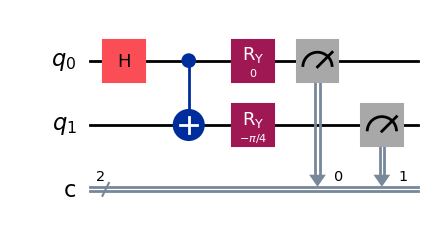

In [ ]:
def make_chsh_circuit(theta_alice, theta_bob):
    """
    Creates a quantum circuit for one instance of the CHSH game.
    Args:
        theta_alice (float): Rotation angle for Alice's measurement basis.
        theta_bob (float): Rotation angle for Bob's measurement basis.
    Returns:
        QuantumCircuit: The constructed circuit.
    """
    qc = QuantumCircuit(2, 2)

    # 1. Prepare Bell State |Phi+> = (|00> + |11>) / sqrt(2)
    qc.h(0)
    qc.cx(0, 1)

    # 2. Rotate measurement bases
    # To measure in a basis rotated by theta, we apply Ry(-theta)
    # This aligns the desired axis with the standard Z-axis for measurement.
    qc.ry(-theta_alice, 0) # Alice operates on qubit 0
    qc.ry(-theta_bob, 1)   # Bob operates on qubit 1

    # 3. Measure in standard Z-basis
    qc.measure([0, 1], [0, 1])

    return qc

print("Example Circuit for x=0, y=0:")
display(make_chsh_circuit(0, np.pi/4).draw('mpl'))

[Image of Quantum Circuit Diagram]

#### **Cell 6: Code (Simulation & Calculation)**

In [ ]:
# Define angles corresponding to inputs x and y
# Alice: 0 -> 0, 1 -> pi/2
# Bob:   0 -> pi/4, 1 -> -pi/4
angles_alice = {0: 0, 1: np.pi/2}
angles_bob   = {0: np.pi/4, 1: -np.pi/4}

shots = 5000
results_data = []
correlations = {}

print(f"Running simulation with {shots} shots per pair...\n")

# Loop through all 4 input pairs (0,0), (0,1), (1,0), (1,1)
for x in [0, 1]:
    for y in [0, 1]:
        theta_a = angles_alice[x]
        theta_b = angles_bob[y]

        # Build circuit
        qc = make_chsh_circuit(theta_a, theta_b)

        # Run simulation
        job = simulator.run(qc, shots=shots)
        result = job.result()
        counts = result.get_counts()

        # Calculate counts for outcomes 00, 01, 10, 11
        # Qiskit keys are 'bitstring'. e.g. '01' means a=1, b=0 (little endian in list, but string order depends)
        # In Qiskit '10' means q1=1, q0=0.
        # Let's parse strictly:
        same_count = counts.get('00', 0) + counts.get('11', 0)
        diff_count = counts.get('01', 0) + counts.get('10', 0)

        # Calculate Probability and Correlation
        total = same_count + diff_count
        prob_same = same_count / total
        prob_diff = diff_count / total
        E_xy = prob_same - prob_diff # Correlation: (+1 for same) + (-1 for diff)

        # Store correlation
        correlations[(x,y)] = E_xy

        # Check win condition for the game (Win if a XOR b == x AND y)
        # if x*y == 0, we want a == b (same).
        # if x*y == 1, we want a != b (diff).
        if (x * y) == 0:
            win_prob = prob_same
        else:
            win_prob = prob_diff

        results_data.append({
            "x (Alice)": x,
            "y (Bob)": y,
            "Angle Alice": round(theta_a, 2),
            "Angle Bob": round(theta_b, 2),
            "Correlation E(x,y)": E_xy,
            "Win Probability": win_prob
        })

# Compute CHSH S value
# S = E(0,0) + E(0,1) + E(1,0) - E(1,1)
S_value = correlations[(0,0)] + correlations[(0,1)] + correlations[(1,0)] - correlations[(1,1)]

# Display Results
df_results = pd.DataFrame(results_data)
print(df_results)
print("\n" + "="*40)
print(f"Calculated CHSH Value S = {S_value:.4f}")
print("="*40)

# Theoretical Max
print(f"Classical Limit: 2.0")
print(f"Quantum Limit:   {2 * np.sqrt(2):.4f}")

Running simulation with 5000 shots per pair...

   x (Alice)  y (Bob)  Angle Alice  Angle Bob  Correlation E(x,y)  \
0          0        0         0.00       0.79              0.7056   
1          0        1         0.00      -0.79              0.7100   
2          1        0         1.57       0.79              0.7008   
3          1        1         1.57      -0.79             -0.6968   

   Win Probability  
0           0.8528  
1           0.8550  
2           0.8504  
3           0.8484  

Calculated CHSH Value S = 2.8132
Classical Limit: 2.0
Quantum Limit:   2.8284


#### **Cell 7: Code (Visualization)**

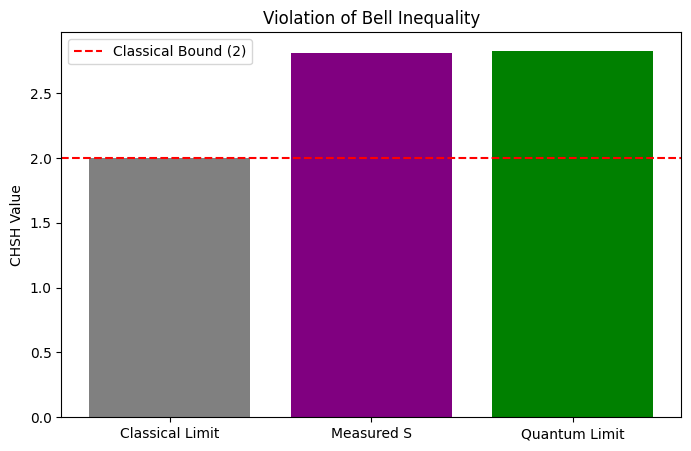

In [ ]:
# Visualize the S value compared to limits
plt.figure(figsize=(8, 5))
plt.bar(['Classical Limit', 'Measured S', 'Quantum Limit'],
        [2.0, S_value, 2 * np.sqrt(2)],
        color=['gray', 'purple', 'green'])
plt.axhline(y=2.0, color='r', linestyle='--', label='Classical Bound (2)')
plt.ylabel('CHSH Value')
plt.title('Violation of Bell Inequality')
plt.legend()
plt.show()

## Interpretation of Results

1.  **Violation:** The calculated $S$ value (2.8) significantly exceeds the classical bound of 2. This empirically proves that the description of reality provided by local hidden variable theories is incomplete.
2.  **Entanglement Power:** The result relies entirely on the entanglement of the Bell pair. Without entanglement, the correlations $E(x,y)$ would be limited such that $S \leq 2$.
3.  **Game Win Rate:**
    * In the classical case, the best average win rate is 75%.
    * Looking at our `Win Probability` column, we see win rates consistently around 85% ($\cos^2(\pi/8)$) for all input pairs.

In [ ]:
# Save results to CSV for download
csv_filename = "chsh_results.csv"
df_results.to_csv(csv_filename, index=False)
print(f"Results saved to {csv_filename}")

from google.colab import files
# Uncomment the line below to trigger download in Colab
# files.download(csv_filename)

Results saved to chsh_results.csv
